We will build a KNN algorithm for the classification from scratch and compare it to the KNeighborsClassifier from sklearn.
First we will create a dummy datatset and test all the functions in the build and then employ the iris dataset to compare the result with the
sklearn package.

In [140]:
import pandas as pd
import numpy as np
from math import sqrt
import os
import matplotlib.pyplot as plt
os.chdir('C:/Users/mithu/OneDrive/ML')

In [141]:
# Test distance function
dataset = [[2.7810836,2.550537003,0],
	[1.465489372,2.362125076,0],
	[3.396561688,4.400293529,0],
	[1.38807019,1.850220317,0],
	[3.06407232,3.005305973,0],
	[7.627531214,2.759262235,1],
	[5.332441248,2.088626775,1],
	[6.922596716,1.77106367,1],
	[8.675418651,-0.242068655,1],
	[7.673756466,3.508563011,1]]
dataset=np.array(dataset)

Lets plot the dataset where there are only two classes and two features. 

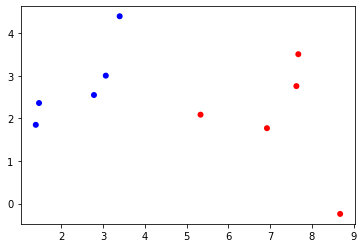

In [150]:
x = dataset[:,0]
y = dataset[:,1]
c = dataset[:,2].astype(int)
mycolors = np.array([ 'b', 'r' ])
# plot the data
fig = plt.figure()
ax = fig.add_subplot(111)
# plot x,y data with c as the color vector, set the line width of the markers to 0
ax.scatter(x, y, c=mycolors[c], lw=0)

Lets create the euclidian distance that will define the closes neighbours.

In [16]:
def euclidian(p,q):
    s=0.0
    for i in range(len(p)-1):
        s+=(p[i]-q[i])**2
    return sqrt(s)

Let's test the created function. Look good!

In [17]:
row0 = dataset[0]
for row in dataset:
	distance = euclidian(row0, row)
	print(distance)

0.0
1.3290173915275787
1.9494646655653247
1.5591439385540549
0.5356280721938492
4.850940186986411
2.592833759950511
4.214227042632867
6.522409988228337
4.985585382449795


Lets get the neighbour function which will define its K number of neighbour based on the closest euclidian distance. 

In [21]:
def get_neighbour(train,test_row,num_neighbours):
    distance=[]
    for train_row in train:
        dist=euclidian(test_row,train_row)
        distance.append((train_row,dist))
    distance.sort(key=lambda tup:tup[1])
    neighbours=[]
    for i in range(num_neighbours):
        neighbours.append(distance[i][0])
    return neighbours

Lets test this function. As expected, the 3 closest point for the first point which is class-0 are also belong to the same class. 

In [152]:
neighbour=get_neighbour(dataset,dataset[0],3)
neighbour

[array([2.7810836, 2.550537 , 0.       ]),
 array([3.06407232, 3.00530597, 0.        ]),
 array([1.46548937, 2.36212508, 0.        ])]

Lets create a prediction function that will predict a test function class depening on the maximum vote it gains from its closest points. 


In [153]:
#prediction
def prediction_classification(train,test_row,num_neighbours):
    neighbour=get_neighbour(train,test_row,num_neighbours)
    output_values=[row[-1] for row in neighbour]
    prediction=max(set(output_values),key=output_values.count)
    return prediction

We also test this function and finds that prediction is as expected for a random point.

In [154]:
prediction = prediction_classification(dataset, dataset[0], 3)
print('Expected %d, Got %d.' % (dataset[0][-1], prediction))

Expected 0, Got 0.


And here is the total prediction function for all the test points and test this function. Looks good!

In [29]:
def KNN(train,test,k):
    predictions=[]
    for row in test:
        predictions.append(prediction_classification(train,row,k))
    return predictions

KNN(dataset,dataset,3)

In [33]:
np.array(dataset)[:,-1]

array([0., 0., 0., 0., 0., 1., 1., 1., 1., 1.])

Now, lets load the iris datatset. We have to do some preprocessing. Firstly, we need to convert the string class to integer by
labelencoder. 

In [113]:
# k-nearest neighbors on the Iris Flowers Dataset
df=pd.read_csv('iris.txt',names=['X1','X2','X3','X4','Y'])

In [114]:
# Convert string column to float
from sklearn.preprocessing import LabelEncoder
CLASS=LabelEncoder().fit_transform(df.Y)
df['Y']=CLASS  


Lets check if there is any null values. Looks none.

In [115]:
df.isnull() 


,X1,X2,X3,X4,Y
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
145,False,False,False,False,False
146,False,False,False,False,False
147,False,False,False,False,False
148,False,False,False,False,False


We also need to be sure that all the data types are in exact type.

In [117]:
# convert just columns "a" and "b"
df[["X1", "X2","X3","X4"]] = df[["X1", "X2","X3","X4"]].apply(pd.to_numeric)
df.dtypes

X1    float64
X2    float64
X3    float64
X4    float64
Y       int32
dtype: object

We need to normalize the data in [0,1] range. As KNN depends on the distance, it is vulnerable to the outlier. 

In [118]:
# Find the min and max values for each column
minCol=[min(df[col]) for col in df][:-1]
maxCol=[max(df[col]) for col in df][:-1]


In [119]:
# Rescale dataset columns to the range 0-1
j=0
for i in df[["X1", "X2","X3","X4"]]:
    df[i]=(df[i]-minCol[j])/(maxCol[j]-minCol[j])
    j+=0


We will use the accuracy metric for the evaluation criteria. 

In [121]:
# Calculate accuracy percentage
from sklearn.metrics import accuracy_score

Here is the complete class funciton of the KNN algorithm that we tested on the dummy datat. 

In [122]:
class KNN_build:
    def __init__(self,number_of_neighbours=3):
        self.num_of_neighbours=number_of_neighbours
        
    def euclidian_distance(self,p,q):
        s=0.0
        for i in range(p.shape[0]-1):
            s+=(p[i]-q[i])**2
        return sqrt(s)
    # Locate the most similar neighbors
    def neighbours(self,train,test_row):
        distances=[]
        for train_row in train:
            dis=self.euclidian_distance(train_row,test_row)
            distances.append((train_row,dis))
        distances.sort(key=lambda x:x[1])
        neighbour=[]
        for i in range(self.num_of_neighbours):
            neighbour.append(distances[i][0])
        return neighbour
    # Make a prediction with neighbors
    def predictions(self,train,test_row):
        neighbour=self.neighbours(train,test_row)
        outputs=[row[-1] for row in neighbour]
        class_ret=max(set(outputs), key=outputs.count)
        return class_ret
    # kNN Algorithm
    def KNNalgo(self,train,test):
        pred=[]
        for row in test:
            pred.append(self.predictions(train,row))
        return pred

We will split the dataset into 10-folds and compare the accuracy scores with the sklearn builtint KNNClassifiers. We use K=3 in the both models. 

In [126]:
# Split a dataset into k folds
from sklearn.model_selection import KFold # import KFold
KF=KFold(n_splits=10, random_state=121, shuffle=True)#42
# Test the kNN on the Iris Flowers dataset
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
Acc1,Acc2=[],[]
for train_index, test_index in KF.split(df.values):
    X_train=df.iloc[train_index,:].values
    X_test=df.iloc[test_index,:].values
    Y_train,Y_test=df.iloc[train_index,-1].values,df.iloc[test_index,-1].values
    KNN=KNN_build()
    pred=KNN.KNNalgo(X_train,X_test)
    Acc1.append(accuracy_score(Y_test,pred))
    classifier = KNeighborsClassifier(n_neighbors=3)
    classifier.fit(X_train[:,:-1], Y_train.reshape(-1,1))
    y_pred = classifier.predict(X_test[:,:-1])
    Acc2.append(accuracy_score(Y_test,y_pred))
data=[Acc1,Acc2]

C:\Users\mithu\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  app.launch_new_instance()
C:\Users\mithu\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  app.launch_new_instance()
C:\Users\mithu\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  app.launch_new_instance()
C:\Users\mithu\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expe

If we see the following boxplot, we can see that both of the algorithm have the similar values. It is a statement that our algorithm
is working perfectly. Also, the median of the accuracy for both model is approximately 96% whichs is really high. 

[Text(1, 0, 'KNN_algo'), Text(2, 0, 'KNN')]

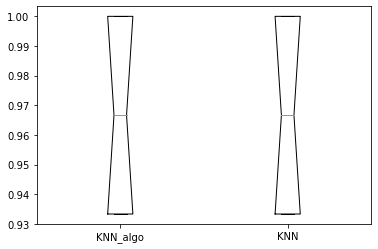

In [127]:
fig, ax = plt.subplots()
ax.boxplot(data, notch=True)
ax.set_xticklabels(['KNN_algo','KNN']) 
